In [13]:
import pandas as pd

In [14]:
housing = pd.read_csv("data.csv")

In [15]:
housing.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [16]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [17]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [18]:
housing.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     1.716290   11.363636   11.136779    0.069170    0.554695    6.284634   
std      2.653510   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081900    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.250895    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      2.326717   12.500000   18.100000    0.000000    0.624000    6.623500   
max      9.966540  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [19]:
%matplotlib inline

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

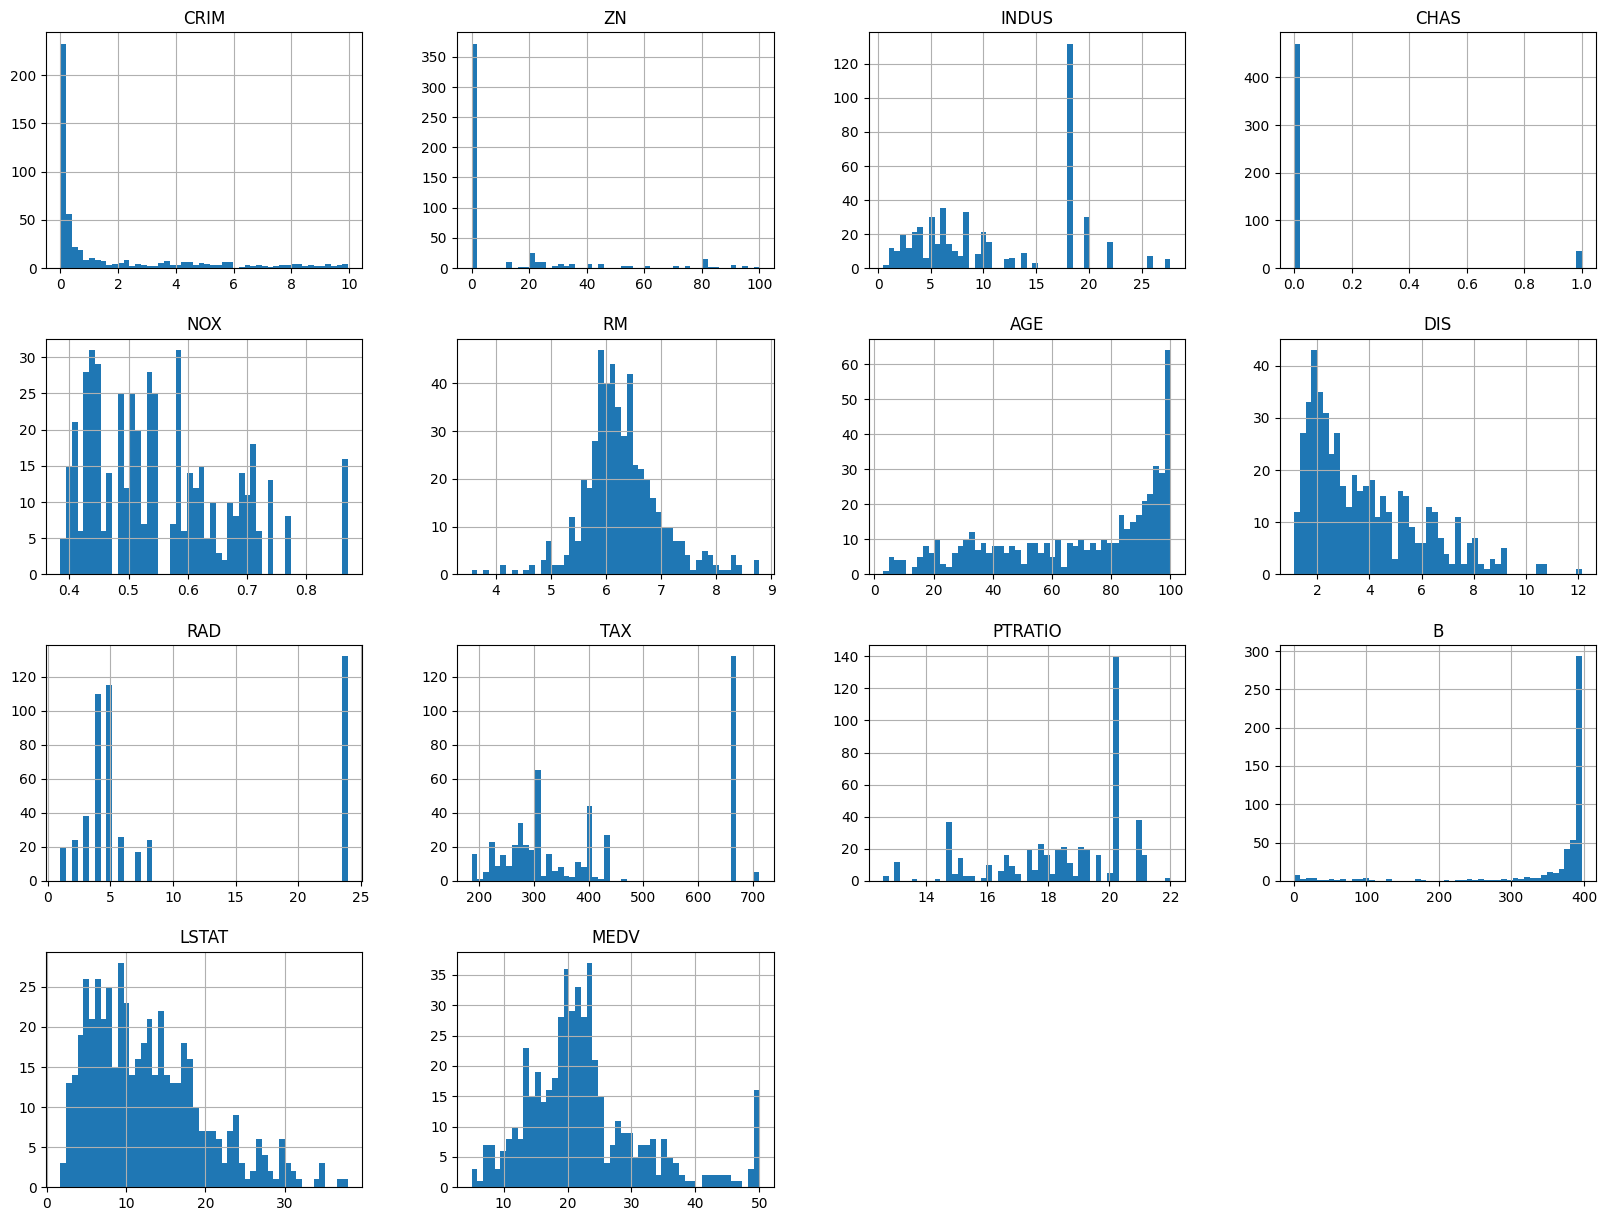

In [20]:
import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize=(20,15))

Train Test Splitting

In [21]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing,test_size= 0.2, random_state=42)
print(f"Rows in train set: {len(train_set)} \nRows in test set: {len(test_set)}\n")

Rows in train set: 404 
Rows in test set: 102



In [22]:
from sklearn.model_selection import StratifiedShuffleSplit
split= StratifiedShuffleSplit(n_splits = 1, test_size= 0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [23]:
strat_test_set['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [24]:
strat_train_set['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

 looking for correlations

In [25]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending= False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
CRIM      -0.362077
AGE       -0.376955
RAD       -0.381626
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

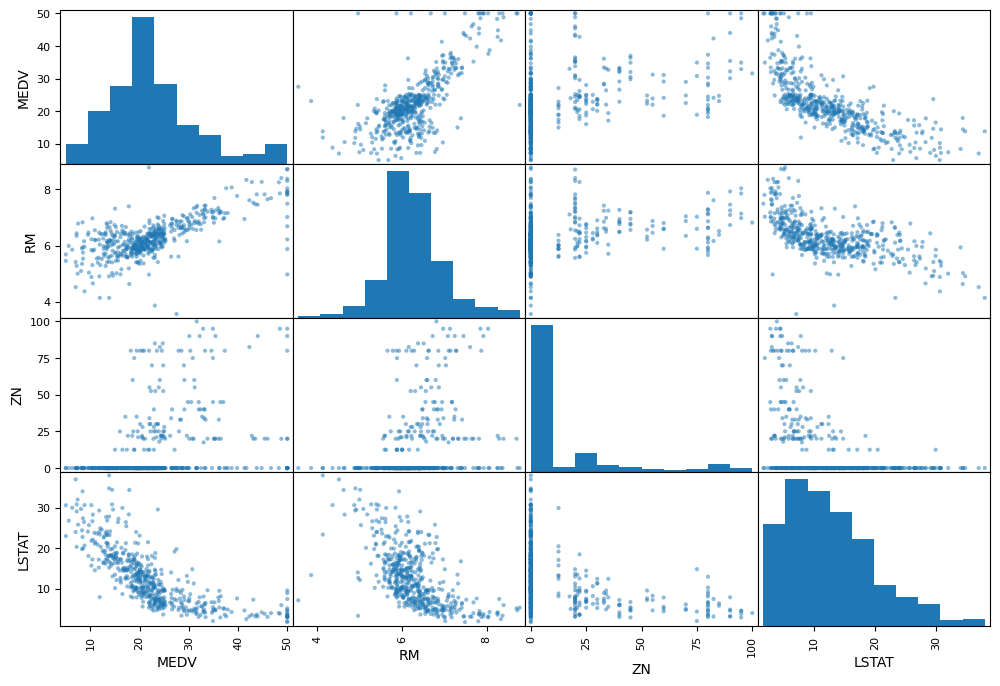

In [26]:
from pandas.plotting import scatter_matrix
attributes=["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize=(12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

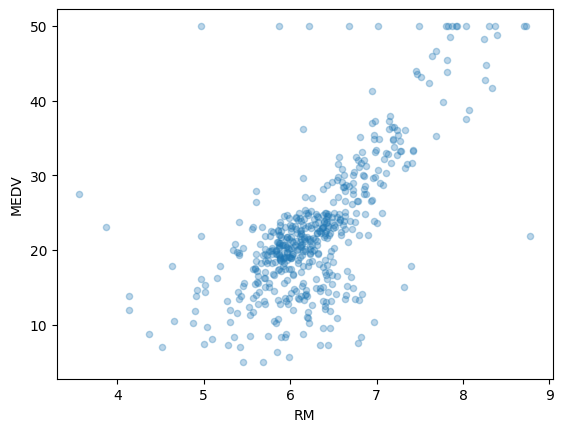

In [27]:
housing.plot(kind="scatter" , x="RM" , y="MEDV", alpha=0.3)

In [28]:
housing['TAXRM']= housing['TAX']/ housing['RM']
housing.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV      TAXRM  
0  396.90   4.98  24.0  45.019011  
1  396.90   9.14  21.6  37.688834  
2  392.83   4.03  34.7  33.681280  
3  394.63   2.94  33.4  31.723350  
4  396.90   5.33  36.2  31.061984

In [29]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending= False)


MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
CRIM      -0.362077
AGE       -0.376955
RAD       -0.381626
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
TAXRM     -0.537650
LSTAT     -0.737663
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

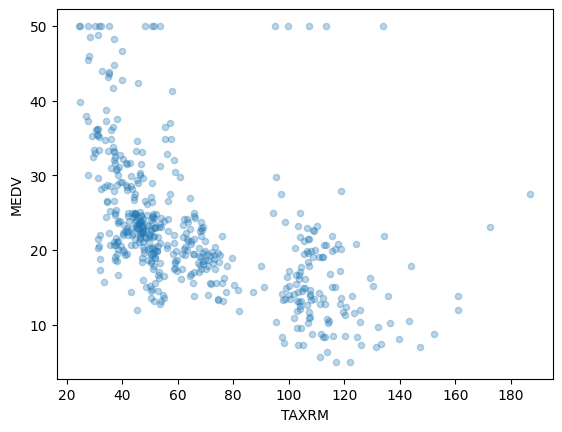

In [30]:
housing.plot(kind="scatter", x="TAXRM" , y="MEDV" , alpha=0.3)

Model for real estate

Training the Model

In [31]:

import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Separating the target variable
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

# Create the pipeline
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

my_pipeline.fit(housing)

# Transform the training data
housing_prepared = my_pipeline.transform(housing)

X_train, X_val, y_train, y_val = train_test_split(housing_prepared, housing_labels, test_size=0.2, random_state=42)

# Define the regressors
regressors = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Elastic Net Regression": ElasticNet(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
}

# Training and evaluating each regressor
for name, regressor in regressors.items():
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_val)
    r2 = r2_score(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    print(f"{name}: R2 Score = {r2:.3f}, MSE = {mse:.3f}")

Linear Regression: R2 Score = 0.660, MSE = 33.899
Ridge Regression: R2 Score = 0.659, MSE = 33.982
Lasso Regression: R2 Score = 0.563, MSE = 43.580
Elastic Net Regression: R2 Score = 0.535, MSE = 46.299
Random Forest Regressor: R2 Score = 0.857, MSE = 14.244
Gradient Boosting Regressor: R2 Score = 0.887, MSE = 11.246
AdaBoost Regressor: R2 Score = 0.870, MSE = 12.970
Support Vector Regressor: R2 Score = 0.614, MSE = 38.460
K-Neighbors Regressor: R2 Score = 0.751, MSE = 24.826
Decision Tree Regressor: R2 Score = 0.783, MSE = 21.602


Saving the Model

In [32]:

from joblib import dump, load

best_model = regressors["Gradient Boosting Regressor"]

dump(best_model, "Real_estate_model.joblib")

dump(my_pipeline, "pipeline.joblib")


['pipeline.joblib']

Hyperparameter Tuning

In [33]:
import optuna
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


def objective(trial):
    # Define the hyperparameters to tune
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    
    # Create the model with the hyperparameters
    model = GradientBoostingRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        min_samples_split=min_samples_split,
        random_state=42
    )
    
  
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    
    return mse

# Creating the Optuna study and optimize
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100, n_jobs=-1)

best_params = study.best_params
print("Best hyperparameters: ", best_params)

best_model = GradientBoostingRegressor(**best_params)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print(f"Final Model MSE: {mse}")

from joblib import dump
dump(best_model, "Best_Real_Estate_Model.joblib")


[I 2025-04-11 14:41:39,571] A new study created in memory with name: no-name-1d0e4db8-de16-4d0d-82db-3bb956551726
C:\Users\rutik\AppData\Local\Temp\ipykernel_2004\3605204956.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
C:\Users\rutik\AppData\Local\Temp\ipykernel_2004\3605204956.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
C:\Users\rutik\AppData\Local\Temp\ipykernel_2004\3605204956.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optun

Best hyperparameters:  {'n_estimators': 179, 'max_depth': 3, 'learning_rate': 0.049454388360765836, 'min_samples_split': 4}
Final Model MSE: 10.91643825426235


['Best_Real_Estate_Model.joblib']

Cross-Validation

In [34]:

from sklearn.model_selection import cross_val_score
import numpy as np

best_model = GradientBoostingRegressor(
    n_estimators=87,
    max_depth=4,
    learning_rate=0.09087068414391353,
    min_samples_split=6,
    random_state=42
)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

cv_scores = -cv_scores

mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print(f"Cross-Validation Mean MSE: {mean_cv_score:.3f}")
print(f"Cross-Validation MSE Standard Deviation: {std_cv_score:.3f}")



Cross-Validation Mean MSE: 15.589
Cross-Validation MSE Standard Deviation: 9.529


Testing 

In [35]:

best_model.fit(X_train, y_train)


y_test_pred = best_model.predict(X_val)


test_mse = mean_squared_error(y_val, y_test_pred)
test_r2 = r2_score(y_val, y_test_pred)

print(f"Test Set MSE: {test_mse:.3f}")
print(f"Test Set R2 Score: {test_r2:.3f}")


Test Set MSE: 10.539
Test Set R2 Score: 0.894


In [36]:

final_predictions = best_model.predict(X_val)


actual_values = list(y_val)


final_mse = mean_squared_error(y_val, final_predictions)


final_rmse = np.sqrt(final_mse)


print("Final Predictions:", final_predictions)
print("Actual Values:", actual_values)
print("Mean Squared Error (MSE):", final_mse)
print("Root Mean Squared Error (RMSE):", final_rmse)


Final Predictions: [22.82885322 14.25933919 13.81090328 11.57356193 36.78649874 13.47473191
 23.27937675 18.49545001 46.38525923 13.76567102 30.37256075 16.44400177
 31.93209021 44.68227506 13.91844499 13.83947047 24.8890091  15.11648771
 31.80171359 10.77909732 31.41913478 16.50645248 19.3803604  25.86327652
 15.08975149 19.76828596 27.07406762 14.32197962 46.66616571 13.06552445
 20.20488442 20.71963993 23.02761249 24.2710045   9.76281727 20.29628544
 20.90871708 28.15609381 19.64671451 20.13734953 41.66672602 32.5187179
 15.21525046  9.65055988 48.89530367 20.55008841 24.96378073 18.68680402
 22.26392672 21.37474675 18.74253385 18.84646088 13.87853068 20.73032042
  7.99251947 20.07962575 10.08788047 22.26379399 18.90424406 13.17548311
 27.9704915  26.63900067 13.64274558 19.57458741 21.58006153 20.01258417
 13.54928681 19.24871218 20.21552627 44.23949669 20.07738169 16.54738133
 28.07996691 47.12929213 20.61228704 18.34822594  9.4504656  23.9118461
 29.61478124 16.32927093 42.765367

In [37]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

feature_importances = best_model.feature_importances_


features = housing.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()


In [26]:
from sklearn.ensemble import GradientBoostingRegressor


best_model = GradientBoostingRegressor(
    n_estimators=87,
    max_depth=4,
    learning_rate=0.09087068414391353,
    min_samples_split=6,
    random_state=42
)
best_model.fit(X_train, y_train)
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(housing_prepared, housing_labels, test_size=0.2, random_state=42)
final_predictions = best_model.predict(X_test)


final_predictions = best_model.predict(X_test)


results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': final_predictions
})


plt.figure(figsize=(10, 6))
plt.scatter(results_df['Actual'], results_df['Predicted'], alpha=0.6)
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()],
         [results_df['Actual'].min(), results_df['Actual'].max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


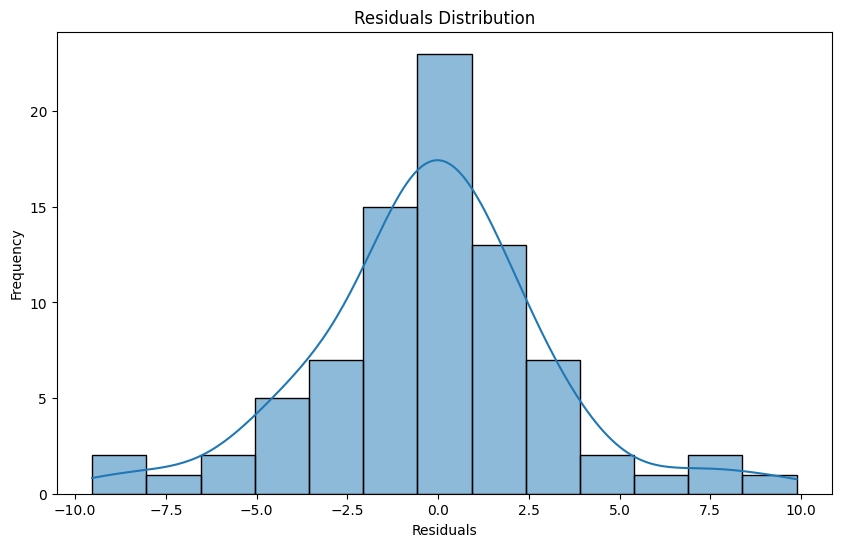

In [27]:

residuals = y_test - final_predictions

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


C:\Users\rutik\AppData\Local\Temp\ipykernel_5304\3835181387.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=scores, palette='viridis')


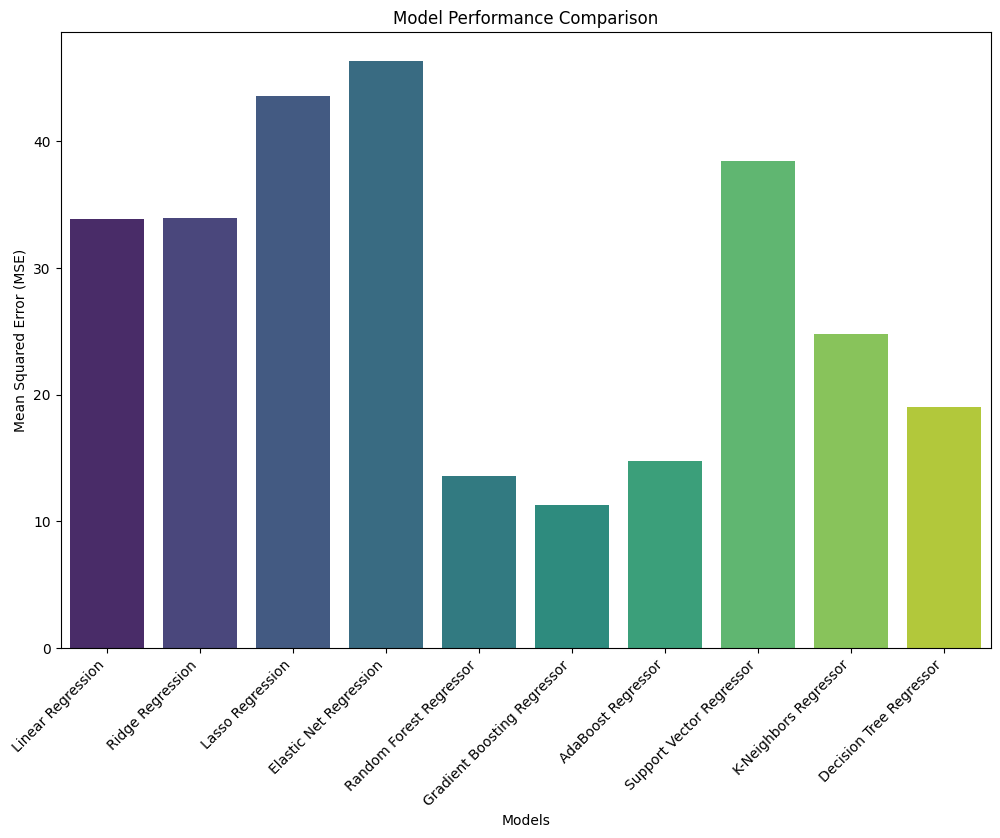

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

models = [
    'Linear Regression', 
    'Ridge Regression', 
    'Lasso Regression', 
    'Elastic Net Regression',
    'Random Forest Regressor', 
    'Gradient Boosting Regressor', 
    'AdaBoost Regressor', 
    'Support Vector Regressor', 
    'K-Neighbors Regressor', 
    'Decision Tree Regressor'
]
scores = [
    33.899,  # Linear Regression
    33.982,  # Ridge Regression
    43.580,  # Lasso Regression
    46.299,  # Elastic Net Regression
    13.599,  # Random Forest Regressor
    11.296,  # Gradient Boosting Regressor
    14.788,  # AdaBoost Regressor
    38.460,  # Support Vector Regressor
    24.826,  # K-Neighbors Regressor
    18.995   # Decision Tree Regressor
]

plt.figure(figsize=(12, 8))
sns.barplot(x=models, y=scores, palette='viridis')
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(rotation=45, ha='right') 
plt.show()



In [29]:
from joblib import dump

dump(best_model, 'final_gradient_boosting_model.joblib')
dump(my_pipeline, 'final_pipeline.joblib')


['final_pipeline.joblib']

In [30]:
from sklearn.metrics import mean_squared_error
import numpy as np


baseline_prediction = np.mean(y_train)


y_pred_baseline = [baseline_prediction] * len(y_test)


baseline_mse = mean_squared_error(y_test, y_pred_baseline)
baseline_rmse = np.sqrt(baseline_mse)

print(f'Baseline RMSE: {baseline_rmse:.3f}')


Baseline RMSE: 9.997


In [31]:
from sklearn.metrics import mean_squared_error
import numpy as np


final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(f'Improved RMSE: {final_rmse:.3f}')


Improved RMSE: 3.246
